# Regression Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
# load dataset1,2,3 with their indexes preserved
dataset1 = pd.read_csv('dataset1.csv', index_col=0)
dataset2 = pd.read_csv('dataset2.csv', index_col=0)
dataset3 = pd.read_csv('dataset3.csv', index_col=0)
# load the outliers
outliers = pd.read_csv('outliers.csv', index_col=0)

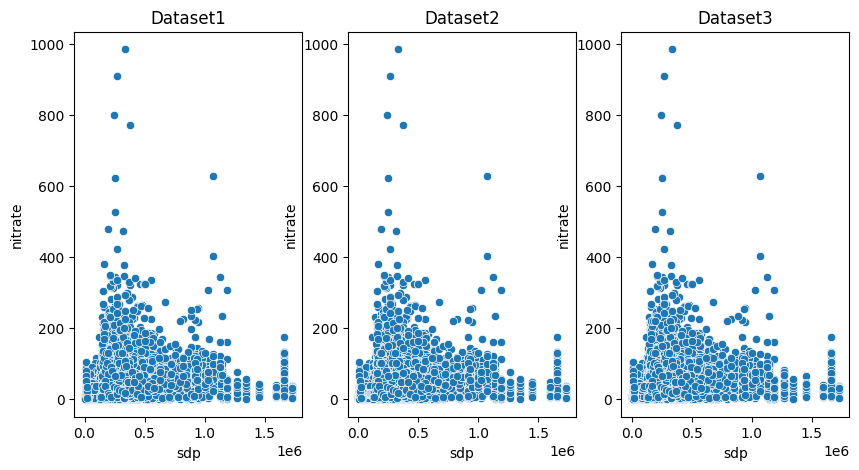

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.scatterplot(x='sdp',y='nitrate',data=dataset1)
plt.title('Dataset1')
plt.subplot(1,3,2)
sns.scatterplot(x='sdp',y='nitrate',data=dataset2)
plt.title('Dataset2')
plt.subplot(1,3,3)
sns.scatterplot(x='sdp',y='nitrate',data=dataset3)
plt.title('Dataset3')
plt.show()

## Regression With Outliers

In [4]:
data=pd.DataFrame({'X1':dataset1['sdp'],'X2':dataset1['outlier'],'Y':dataset1['nitrate']})

X=sm.add_constant(data[['X1','X2']])

model=sm.OLS(data['Y'],X)
results=model.fit()
residuals1=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     2992.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:42   Log-Likelihood:                -34428.
No. Observations:                6761   AIC:                         6.886e+04
Df Residuals:                    6758   BIC:                         6.888e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5958      0.808     49.020      0.0

In [5]:
dataset2['sdp']=dataset2['sdp']/1000
data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['outlier'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals2=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     3149.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:42   Log-Likelihood:                -37125.
No. Observations:                7349   AIC:                         7.426e+04
Df Residuals:                    7346   BIC:                         7.428e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9483      0.731     56.048      0.0

In [6]:
data=pd.DataFrame({'X1':dataset3['sdp'],'X2':dataset3['outlier'],'Y':dataset3['nitrate']})

X=sm.add_constant(data[['X1','X2']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals3=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     2929.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:42   Log-Likelihood:                -37426.
No. Observations:                7346   AIC:                         7.486e+04
Df Residuals:                    7343   BIC:                         7.488e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5251      0.771     52.568      0.0

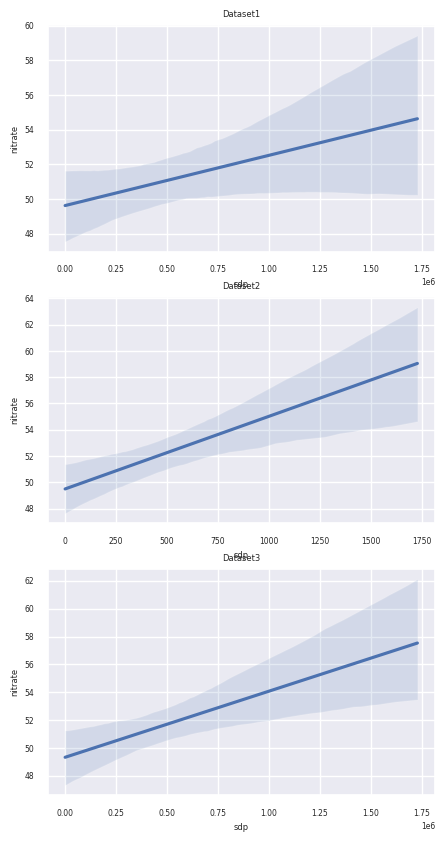

In [7]:
plt.figure(figsize=(5,10))
sns.set_theme(font_scale=0.5)
plt.subplot(3,1,1)
sns.regplot(x='sdp',y='nitrate',data=dataset1,marker='x',scatter=False)
plt.title('Dataset1')
plt.subplot(3,1,2)
sns.regplot(x='sdp',y='nitrate',data=dataset2,marker='x',scatter=False)
plt.title('Dataset2')
plt.subplot(3,1,3)
sns.regplot(x='sdp',y='nitrate',data=dataset3,marker='x',scatter=False)
plt.title('Dataset3')
plt.show()

## Regression after Dropping Outliers

In [8]:
for index in dataset2.index:
    if index in outliers.index:
        print(index)
        dataset2.drop(index,inplace=True)

93
133
304
401
404
405
407
413
415
416
417
571
577
582
629
637
640
1045
1050
1051
1052
1068
1163
1165
1235
1255
1257
1264
1487
1488
1492
1493
1496
1497
1498
1499
1500
1597
1598
1601
1602
1605
1856
2162
2168
2175
2196
2204
2209
2215
2216
2217
2219
2220
2221
2222
2223
2224
2225
2227
2228
2229
2231
2232
2233
2240
2603
2701
2715
2728
2729
2730
2732
2734
2738
2739
2741
2742
2744
2918
2922
3261
3271
3276
3280
3317
3324
3497
3498
3822
3824
3827
3828
3830
3833
3866
3867
3868
3869
3871
3874
3880
3943
3955
3956
3971
4322
4323
4365
4366
4441
4449
4451
4455
4456
4457
4458
4459
4460
4461
4478
4481
4484
4485
4587
4588
4589
4590
4591
4592
4593
4594
4660
4664
4666
4670
4724
4726
4728
4729
4731
4733
4745
4746
4747
4811
4819
4880
4881
4882
4883
4885
4888
4893
4896
4900
5004
5057
5059
5064
5066
5068
5071
5419
5422
5424
5614
5615
5616
5617
5619
5621
5893
5894
6063
6142
6146
6147
6148
6149
6152
6155
6290
6466
6470
6471
6473
6476
6477
6478
6480
6481
6526
6527
6528
6529
6531
6535
6664
6848
6849
6850
6851
703

In [9]:
data=pd.DataFrame({'X1':dataset2['sdp'],'Y':dataset2['nitrate']})
X=sm.add_constant(data['X1'])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals2=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     46.05
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.24e-11
Time:                        23:45:44   Log-Likelihood:                -34419.
No. Observations:                7041   AIC:                         6.884e+04
Df Residuals:                    7039   BIC:                         6.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0345      0.624     65.722      0.0

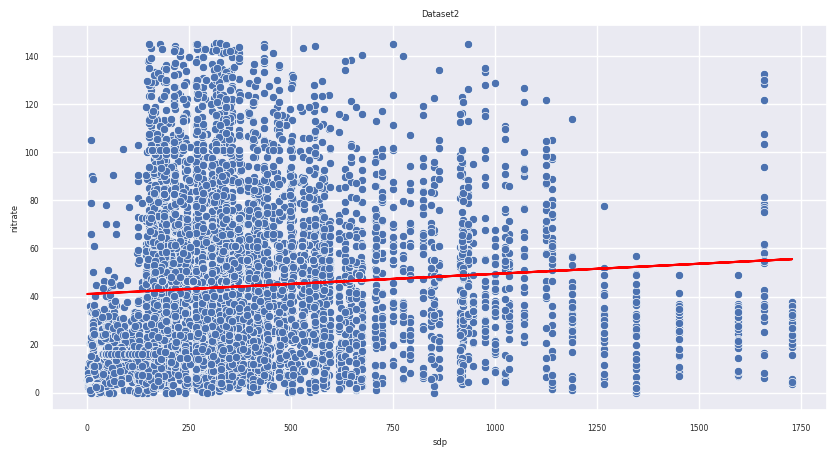

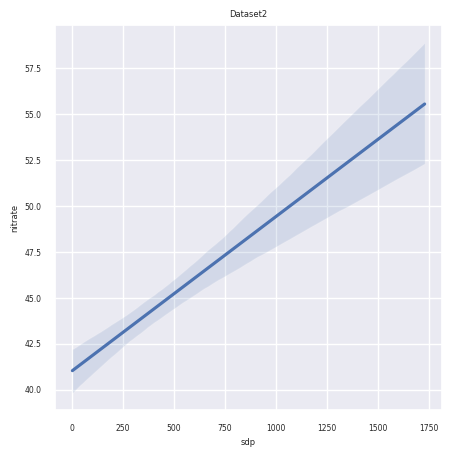

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='sdp',y='nitrate',data=dataset2)
# plot predicted values
plt.plot(dataset2['sdp'],results.predict(X),color='red')
plt.title('Dataset2')
plt.show()

plt.figure(figsize=(5,5))
sns.regplot(x='sdp',y='nitrate',data=dataset2,marker='x',scatter=False)
plt.title('Dataset2')
plt.show()

## Visualizing Residuals

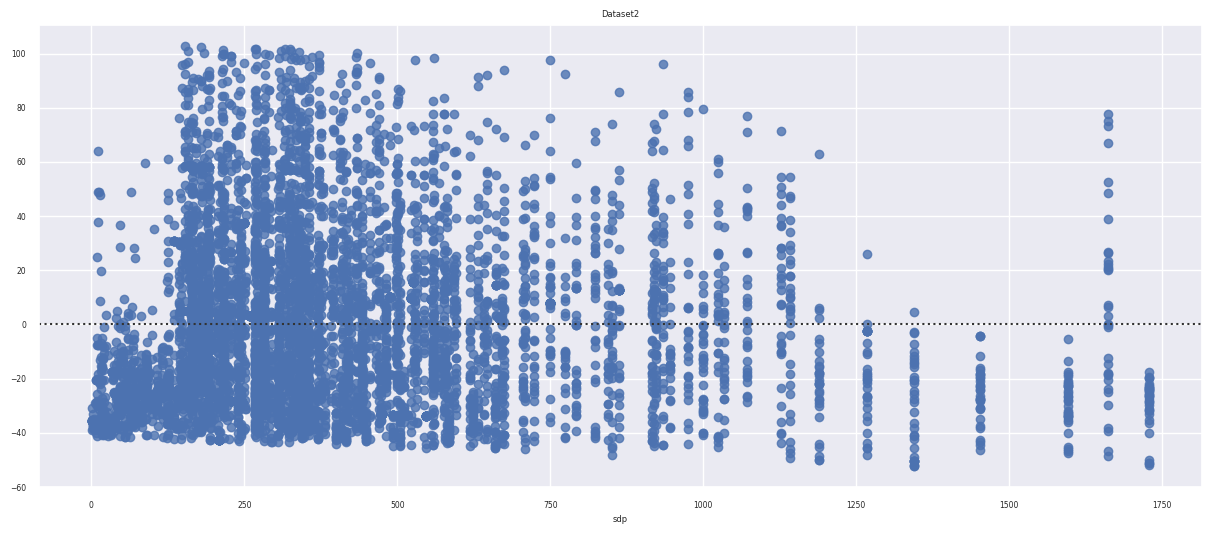

In [11]:
plt.figure(figsize=(15,6))
sns.set_theme(font_scale=0.5)
sns.residplot(x=dataset2['sdp'],y=residuals2)
plt.title('Dataset2')
plt.show()

## Residual Histogram

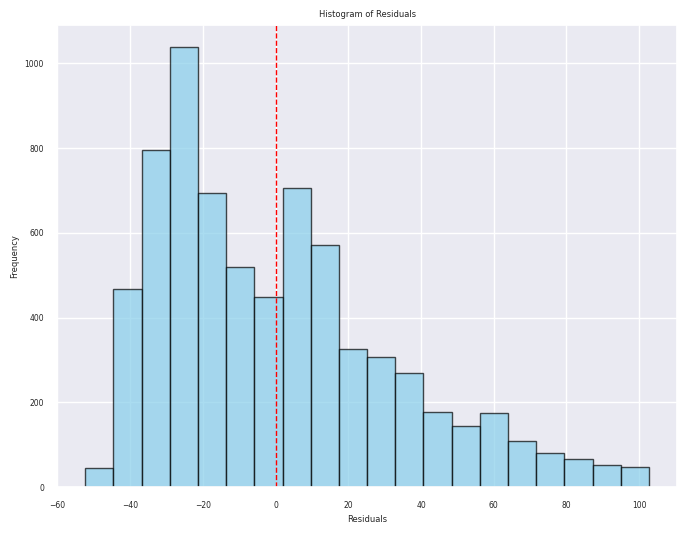

9.817014250069954e-15
6.912159733474255e-11


In [12]:
plt.figure(figsize=(8, 6))
plt.hist(residuals2, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

print(residuals2.mean())
print(residuals2.sum())

### Improved Model

/tmp/ipykernel_16974/1084704267.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75380.99713599999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset2.loc[index,'X^2']=dataset2.loc[index,'sdp']**2


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     157.6
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.09e-67
Time:                        23:45:46   Log-Likelihood:                -34287.
No. Observations:                7041   AIC:                         6.858e+04
Df Residuals:                    7038   BIC:                         6.860e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2883      0.899     33.707      0.0

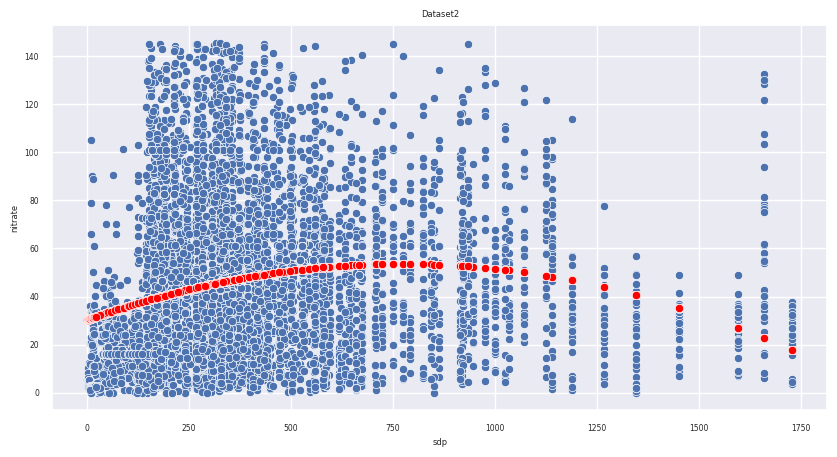

In [13]:
dataset2['X^2']=0
for index in dataset2.index:
    dataset2.loc[index,'X^2']=dataset2.loc[index,'sdp']**2

data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['X^2'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_quad=results.resid
print(results.summary())

plt.figure(figsize=(10,5))
sns.scatterplot(x='sdp',y='nitrate',data=dataset2)
sns.scatterplot(x=dataset2['sdp'],y=results.predict(),color='red')
plt.title('Dataset2')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     126.0
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.70e-79
Time:                        23:45:46   Log-Likelihood:                -34257.
No. Observations:                7041   AIC:                         6.852e+04
Df Residuals:                    7037   BIC:                         6.855e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0990      2.109     21.380      0.0

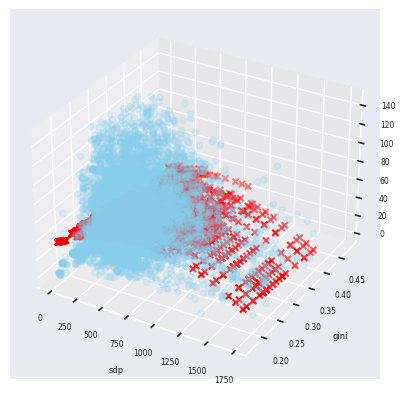

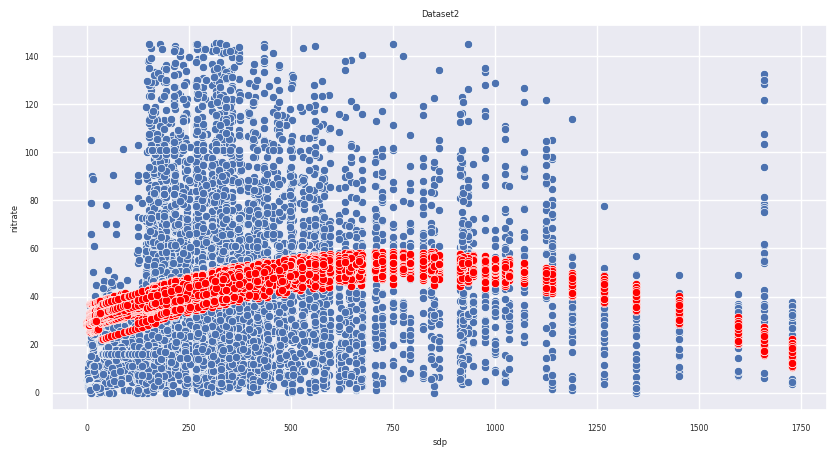

In [14]:
data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['X^2'],'X3':dataset2['gini'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2','X3']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_gini_quad=results.resid
print(results.summary())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset2['sdp'], dataset2['gini'], dataset2['nitrate'], c='skyblue', marker='o',alpha=0.2)
ax.scatter(dataset2['sdp'], dataset2['gini'], results.predict(), c='red', marker='x')
ax.set_xlabel('sdp')
ax.set_ylabel('gini')
ax.set_zlabel('nitrate')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='sdp',y='nitrate',data=dataset2)
sns.scatterplot(x=dataset2['sdp'],y=results.predict(),color='red')
plt.title('Dataset2')
plt.show()


/tmp/ipykernel_16974/472368730.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20696305.049671613' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset2.loc[index,'X^3']=dataset2.loc[index,'sdp']**3


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     141.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          3.27e-116
Time:                        23:45:48   Log-Likelihood:                -34170.
No. Observations:                7041   AIC:                         6.835e+04
Df Residuals:                    7036   BIC:                         6.838e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4741      2.206     16.084      0.0

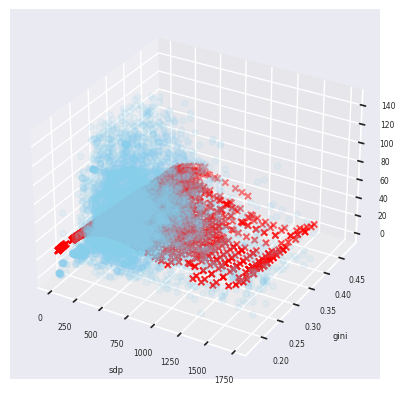

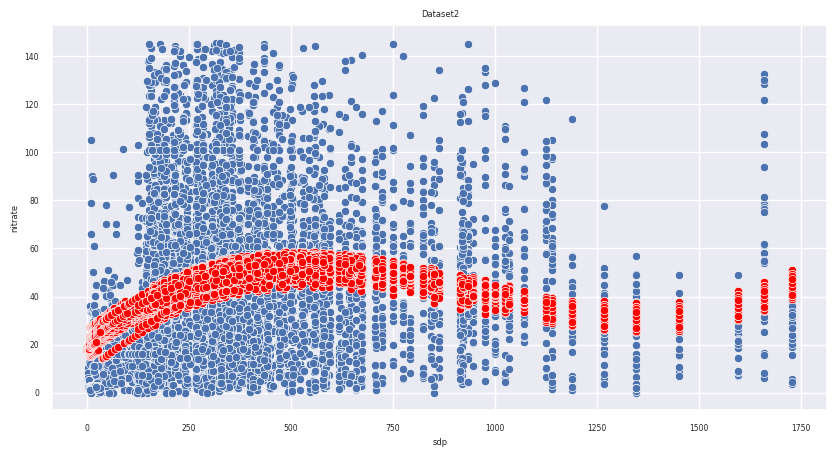

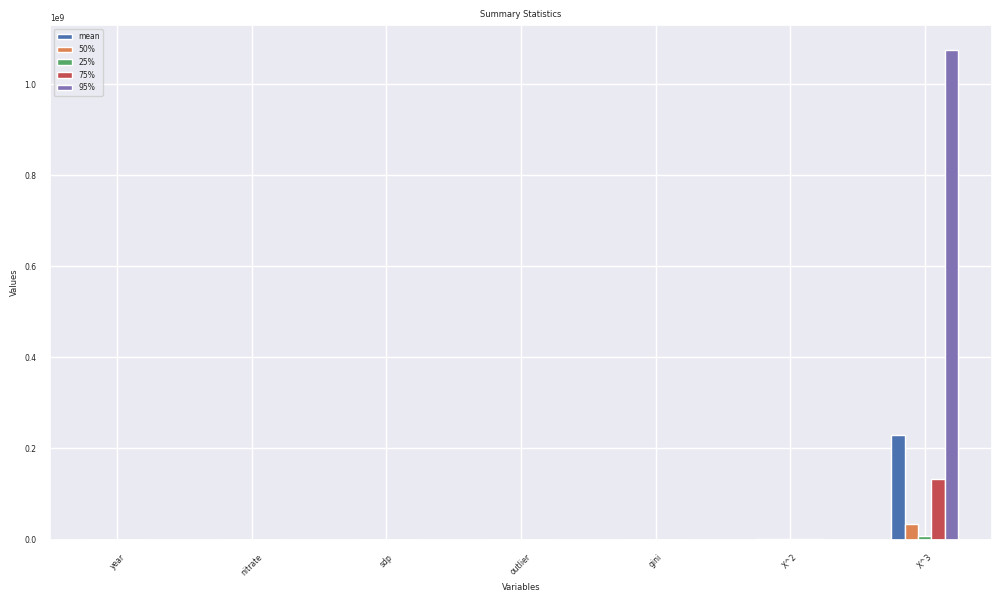

In [15]:
dataset2['X^3']=0
for index in dataset2.index:
    dataset2.loc[index,'X^3']=dataset2.loc[index,'sdp']**3

data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['X^2'],'X3':dataset2['X^3'],'X4':dataset2['gini'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2','X3','X4']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_cubic_gini_quad=results.resid
print(results.summary())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset2['sdp'], dataset2['gini'], dataset2['nitrate'], c='skyblue',alpha=0.1)
ax.scatter(dataset2['sdp'], dataset2['gini'], results.predict(), c='red',marker='x')
ax.set_xlabel('sdp')
ax.set_ylabel('gini')
ax.set_zlabel('nitrate')
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset2['sdp'],y=dataset2['nitrate'])
sns.scatterplot(x=dataset2['sdp'],y=results.predict(),color='red')
plt.title('Dataset2')
plt.show()

summary_stats = dataset2.describe(percentiles=[0.25, 0.5, 0.75, 0.95])
summary_stats = summary_stats.T

plt.figure(figsize=(10, 6))
summary_stats[['mean', '50%', '25%', '75%', '95%']].plot(kind='bar', ax=plt.gca())
plt.title('Summary Statistics')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()

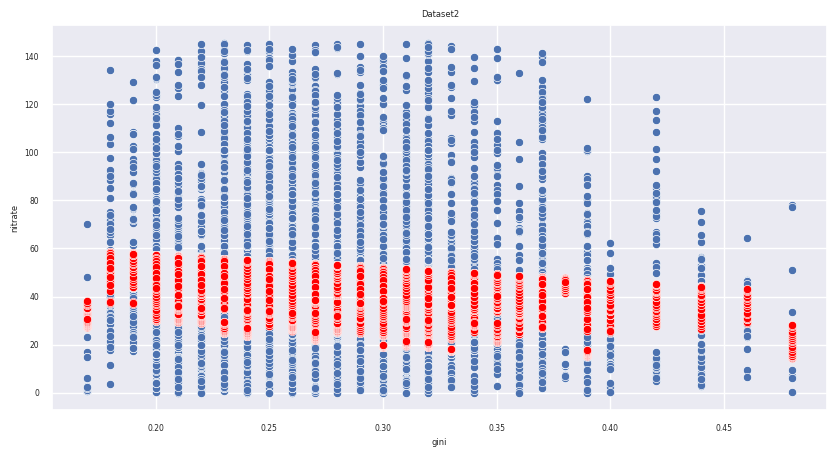

In [16]:
# plot graphs of the nitrate levels with respect to gini index and predicted values
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataset2['gini'],y=dataset2['nitrate'])
sns.scatterplot(x=dataset2['gini'],y=results.predict(),color='red')
plt.title('Dataset2')
plt.show()

## Considering effect over time

In [17]:
dataset2['time']=0
for index in dataset2.index:
    dataset2.loc[index,'time']=dataset2.loc[index,'year']-2000

dataset2['sdpxtime']=dataset2['sdp']*dataset2['time']
dataset2['ginixtime']=dataset2['gini']*dataset2['time']
dataset2['X^2xtime']=dataset2['X^2']*dataset2['time']

data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['X^2'],'X3':dataset2['X^3'],'X4':dataset2['gini'],'X5':dataset2['time'],'X6':dataset2['sdpxtime'],'X7':dataset2['ginixtime'],'X8':dataset2['X^2xtime'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2','X3','X4','X5','X6','X7','X8']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_time_cubic_gini_quad=results.resid
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     97.17
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          5.70e-154
Time:                        23:45:50   Log-Likelihood:                -34073.
No. Observations:                7041   AIC:                         6.816e+04
Df Residuals:                    7032   BIC:                         6.822e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6204      3.952     11.291      0.0

In [19]:
northern_states=['CH','DL','HR','HP','JK','PB','RJ']

northeastern_states=['AP','AS','MN','ML','MZ','NL','TR']

eastern_states=['BR','JH','OD','WB','AN','SK']

central_states=['CG','MP','UP','UK']

western_states=['GA','GJ','MH','DN']

southern_states=['AP','KA','KL','TN','TG','LK','PY']

dataset2['north']=0
dataset2['east']=0
dataset2['central']=0
dataset2['west']=0
dataset2['south']=0

for index in dataset2.index:
    if dataset2.loc[index,'state'] in northern_states:
        dataset2.loc[index,'north']=1
    elif dataset2.loc[index,'state'] in eastern_states:
        dataset2.loc[index,'east']=1
    elif dataset2.loc[index,'state'] in central_states:
        dataset2.loc[index,'central']=1
    elif dataset2.loc[index,'state'] in western_states:
        dataset2.loc[index,'west']=1
    elif dataset2.loc[index,'state'] in southern_states:
        dataset2.loc[index,'south']=1


In [20]:
data=pd.DataFrame({'X1':dataset2['sdp'],'X2':dataset2['X^2'],'X3':dataset2['X^3'],'X4':dataset2['gini'],'X5':dataset2['time'],'X6':dataset2['north'],'X7':dataset2['east'],'X8':dataset2['central'],'X9':dataset2['west'],'X10':dataset2['south'],'Y':dataset2['nitrate']})
X=sm.add_constant(data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_region_time_cubic_gini_quad=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:51   Log-Likelihood:                -33547.
No. Observations:                7041   AIC:                         6.712e+04
Df Residuals:                    7030   BIC:                         6.719e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0010      3.611      6.923      0.0

In [21]:
data=pd.DataFrame({'X1':dataset2['time'],'Y':dataset2['nitrate']})
X=sm.add_constant(data['X1'])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_time=results.resid
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     32.56
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.20e-08
Time:                        23:45:51   Log-Likelihood:                -34425.
No. Observations:                7041   AIC:                         6.885e+04
Df Residuals:                    7039   BIC:                         6.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.9535      0.734     65.342      0.0

In [22]:
data=pd.DataFrame({'X1':dataset2['time'],'Y':dataset2['sdp']})
X=sm.add_constant(data['X1'])
model=sm.OLS(data['Y'],X)
results=model.fit()
residuals_time_sdp=results.resid
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1856.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:45:51   Log-Likelihood:                -49548.
No. Observations:                7041   AIC:                         9.910e+04
Df Residuals:                    7039   BIC:                         9.911e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.8837      6.286     26.708      0.0